# Statistics:

## Describing a dataset:

In [1]:
import random
workers = 200
num_friends = [random.randint(1, 100) for _ in range(workers)]
#when using a list comprehension, use the left most field to assign a generated/fixed value to the list!!!

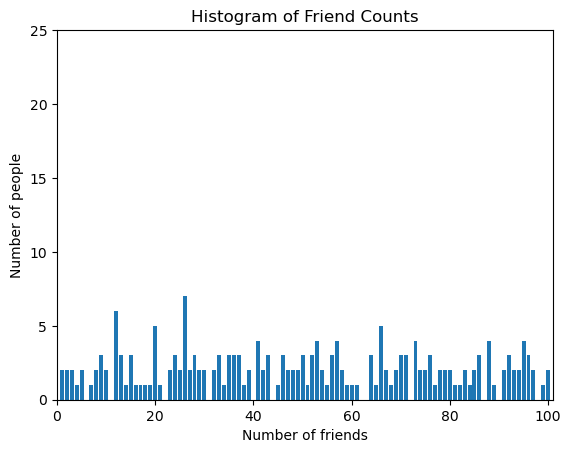

In [2]:
from collections import Counter 
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("Number of friends")
plt.ylabel("Number of people")
plt.show()

In [3]:
num_points = len(num_friends)

In [4]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

In [5]:
sorted_values = sorted(num_friends)
top_3_smallest = sorted_values[:3]

In [6]:
print(f"Largest value: { largest_value}, Smallest value: { smallest_value},  Top 3 smallest: { top_3_smallest}")

Largest value: 100, Smallest value: 1,  Top 3 smallest: [1, 1, 2]


## Central tendency:

### Mean: Sum of the data divided by its count

In [7]:
from typing import List

In [8]:
def mean(xs:List[float]) -> float:
    return sum(xs) / len(xs)

In [9]:
mean(num_friends) #when we increase the data points, the mean increases by .1

49.83

In [10]:
def _median_odd(xs: List[float]) -> float:
    return sorted(xs)[len(xs)//2]

In [11]:
def _median_even(xs: List[float]) -> float:
    sorted_values = sorted(xs)
    hi_mid_point = len(xs)//2
    return (sorted_values[hi_mid_point] + sorted_values[hi_mid_point-1])/2

In [12]:
def median(v: List[float]) -> float:
    return _median_even(v) if len(v)%2 == 0 else _median_odd(v) 

In [13]:
assert median([1, 2, 3, 4, 5, 6, 7]) == 4
assert median([1, 2, 3, 4, 5, 6]) == (3 + 4) / 2

In [14]:
print(median(num_friends))

49.5


### Quantile: separates a percentage of the data (generalization of the median)

In [15]:
def quantile(xs: List[float], p: float) -> float:
    p_index = int(p*len(xs))
    return sorted(xs)[p_index]

### Mode: most frequent values:

In [23]:
def mode(x:List[float]) -> List[float]:
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count  == max_count]
    

In [24]:
assert set(mode([1, 2, 1, 1])) == {1}

## Dispersion: measures the data distribution

In [25]:
#data range determines the difference the max data-point and min data-point
def data_range(xs:List[float]) -> float:
    return max(xs) - min(xs) #non-dependent of values

In [27]:
assert data_range(num_friends) == 99

In [34]:
from scratch.lin_alg import sum_of_squares

In [35]:
def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    #Translating the values subtracting the mean (result will have mean 0)
    return [x - x_bar for x in xs]

In [38]:
def variance(xs: List[float]) -> float:
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

In [40]:
assert 800.78 < variance(num_friends) < 800.80

### Standard Deviation: calculates the average distance of each data point from the mean

In [43]:
import math

def standard_deviation(xs: List[float]) -> float:
    #average distance of each data point from the mean
    return math.sqrt(variance(xs))

In [45]:
assert 28.28 < standard_deviation(num_friends) < 28.30

### Interquartile range: calculates difference between between 75º percentile and 25º percentile

In [47]:
def innterquartile_range(xs:List[float]) -> float:
    return quantile(xs, .75) - quantile(xs, .25)

In [50]:
assert innterquartile_range(num_friends) == 48